In [2]:
import random 
import matplotlib.pyplot as plt
import numpy as np 

#inizialmente pensavo di inserire i parametri da un file o da tastiera, tuttavia ho pensato che considerando che i parametri sono soltanto quattro e che il Python è precompilato sarebbe stato più veloce cambiarli direttamente nel codice qui sotto.
t = 10000 #int(input()) #tempo totale della simulazione
n = 100 #int(input()) #numero di intervalli per ogni step
x0 = 0 #float(input()) #valore iniziale
gamma = 0.1 #float(input()) #valore di gamma, 0.1 fa ottenere buoni risultati

dt = 1/n #lasso di tempo per ogni intervallo
N = t*n #numero totali di punti

In [3]:
Z = np.zeros(N) #creo un array vuoto pieno di zeri

for i in range(0,N):
    Z[i] = random.gauss(0,2*dt) #popolo Z di numeri generati gaussianamente, la media è 0 e la varianza 2*dt

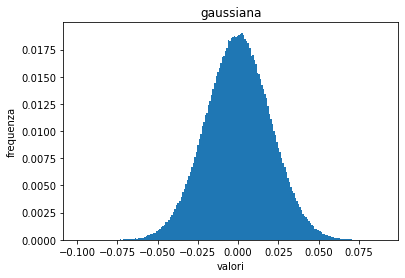

In [4]:
#visualizziamo Z per vedere se è effettivamente la gaussiana voluta
wts1 = np.ones_like(Z) / len(Z) #np.ones_like(Z) crea un array lungo quanto Z ma popolato solo da 1s

plt.title("gaussiana")
plt.xlabel("valori")
plt.ylabel("frequenza")
plt.hist(Z,200,weights=wts1) #weights è il fattore moltiplicativo dato ad ogni valore
plt.show() #in una IDE non serve a niente, da terminale meglio metterlo perchè a volte non mostra i grafici nonostante li computi

In [5]:
x = np.zeros(N) #creo un array vuoto piena di zeri
x[0] = x0 #ci aggiungo l'elemento x0

for i in range(0,N-1):
    xplus1 = x[i] - (gamma * x[i] * dt) + Z[i] #eulero, qui calcolo l'elemento x[i+1] basandomi su x del passo precedente, h=gamma*x, g=1
    x[i+1] = xplus1 #qui popolo x con gli elementi x[i+1] trovati

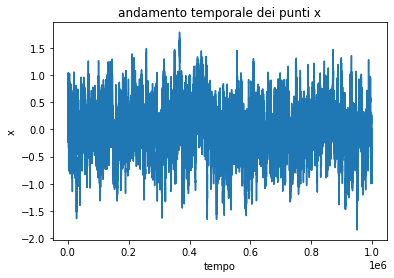

In [13]:
#visualizziamo l'andamento dei punti
plt.title("andamento temporale dei punti x")
plt.xlabel("tempo")
plt.ylabel("x")
plt.plot(x) 
plt.show()

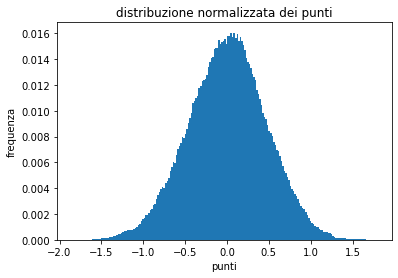

In [6]:
#visualizziamo la distribuzione dei punti, normalizzata
wts2 = np.ones_like(x) / len(x) #np.ones_like(x) crea un array lungo quanto x ma popolato solo da 1s

plt.title("distribuzione normalizzata dei punti")
plt.xlabel("punti")
plt.ylabel("frequenza")
plt.hist(x,200, weights=wts2)  #weights è il fattore moltiplicativo dato ad ogni valore
plt.show()

In [10]:
print("la media è:", np.mean(x))
print("la varianza è:", np.var(x))

la media è: 0.004759682782581472
la varianza è: 0.21597950048944956


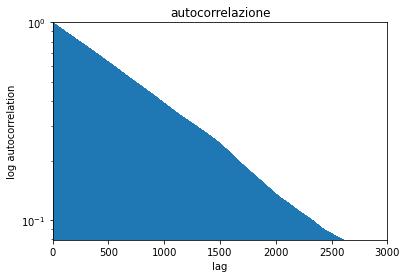

In [14]:
#qui facciamo l'autocorrelazione e vediamo che viene
plt.acorr(x,maxlags=10000) #il maxlags è 100*100 perché in realtà fra x0 e x1 ci sono 100 punti di distanza nel nostro array, questo sarebbe il lag a 100
plt.yscale('log') #questo setta l'asse y logaritmico
plt.xlim(0,3000) #questo limita l'asse x
plt.ylim(top=1) #questo limite superiormente l'asse y
plt.title("autocorrelazione")
plt.xlabel("lag")
plt.ylabel("log autocorrelation")
plt.show()